In [103]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
M=nx.read_gml("polblogs.gml")

In [105]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

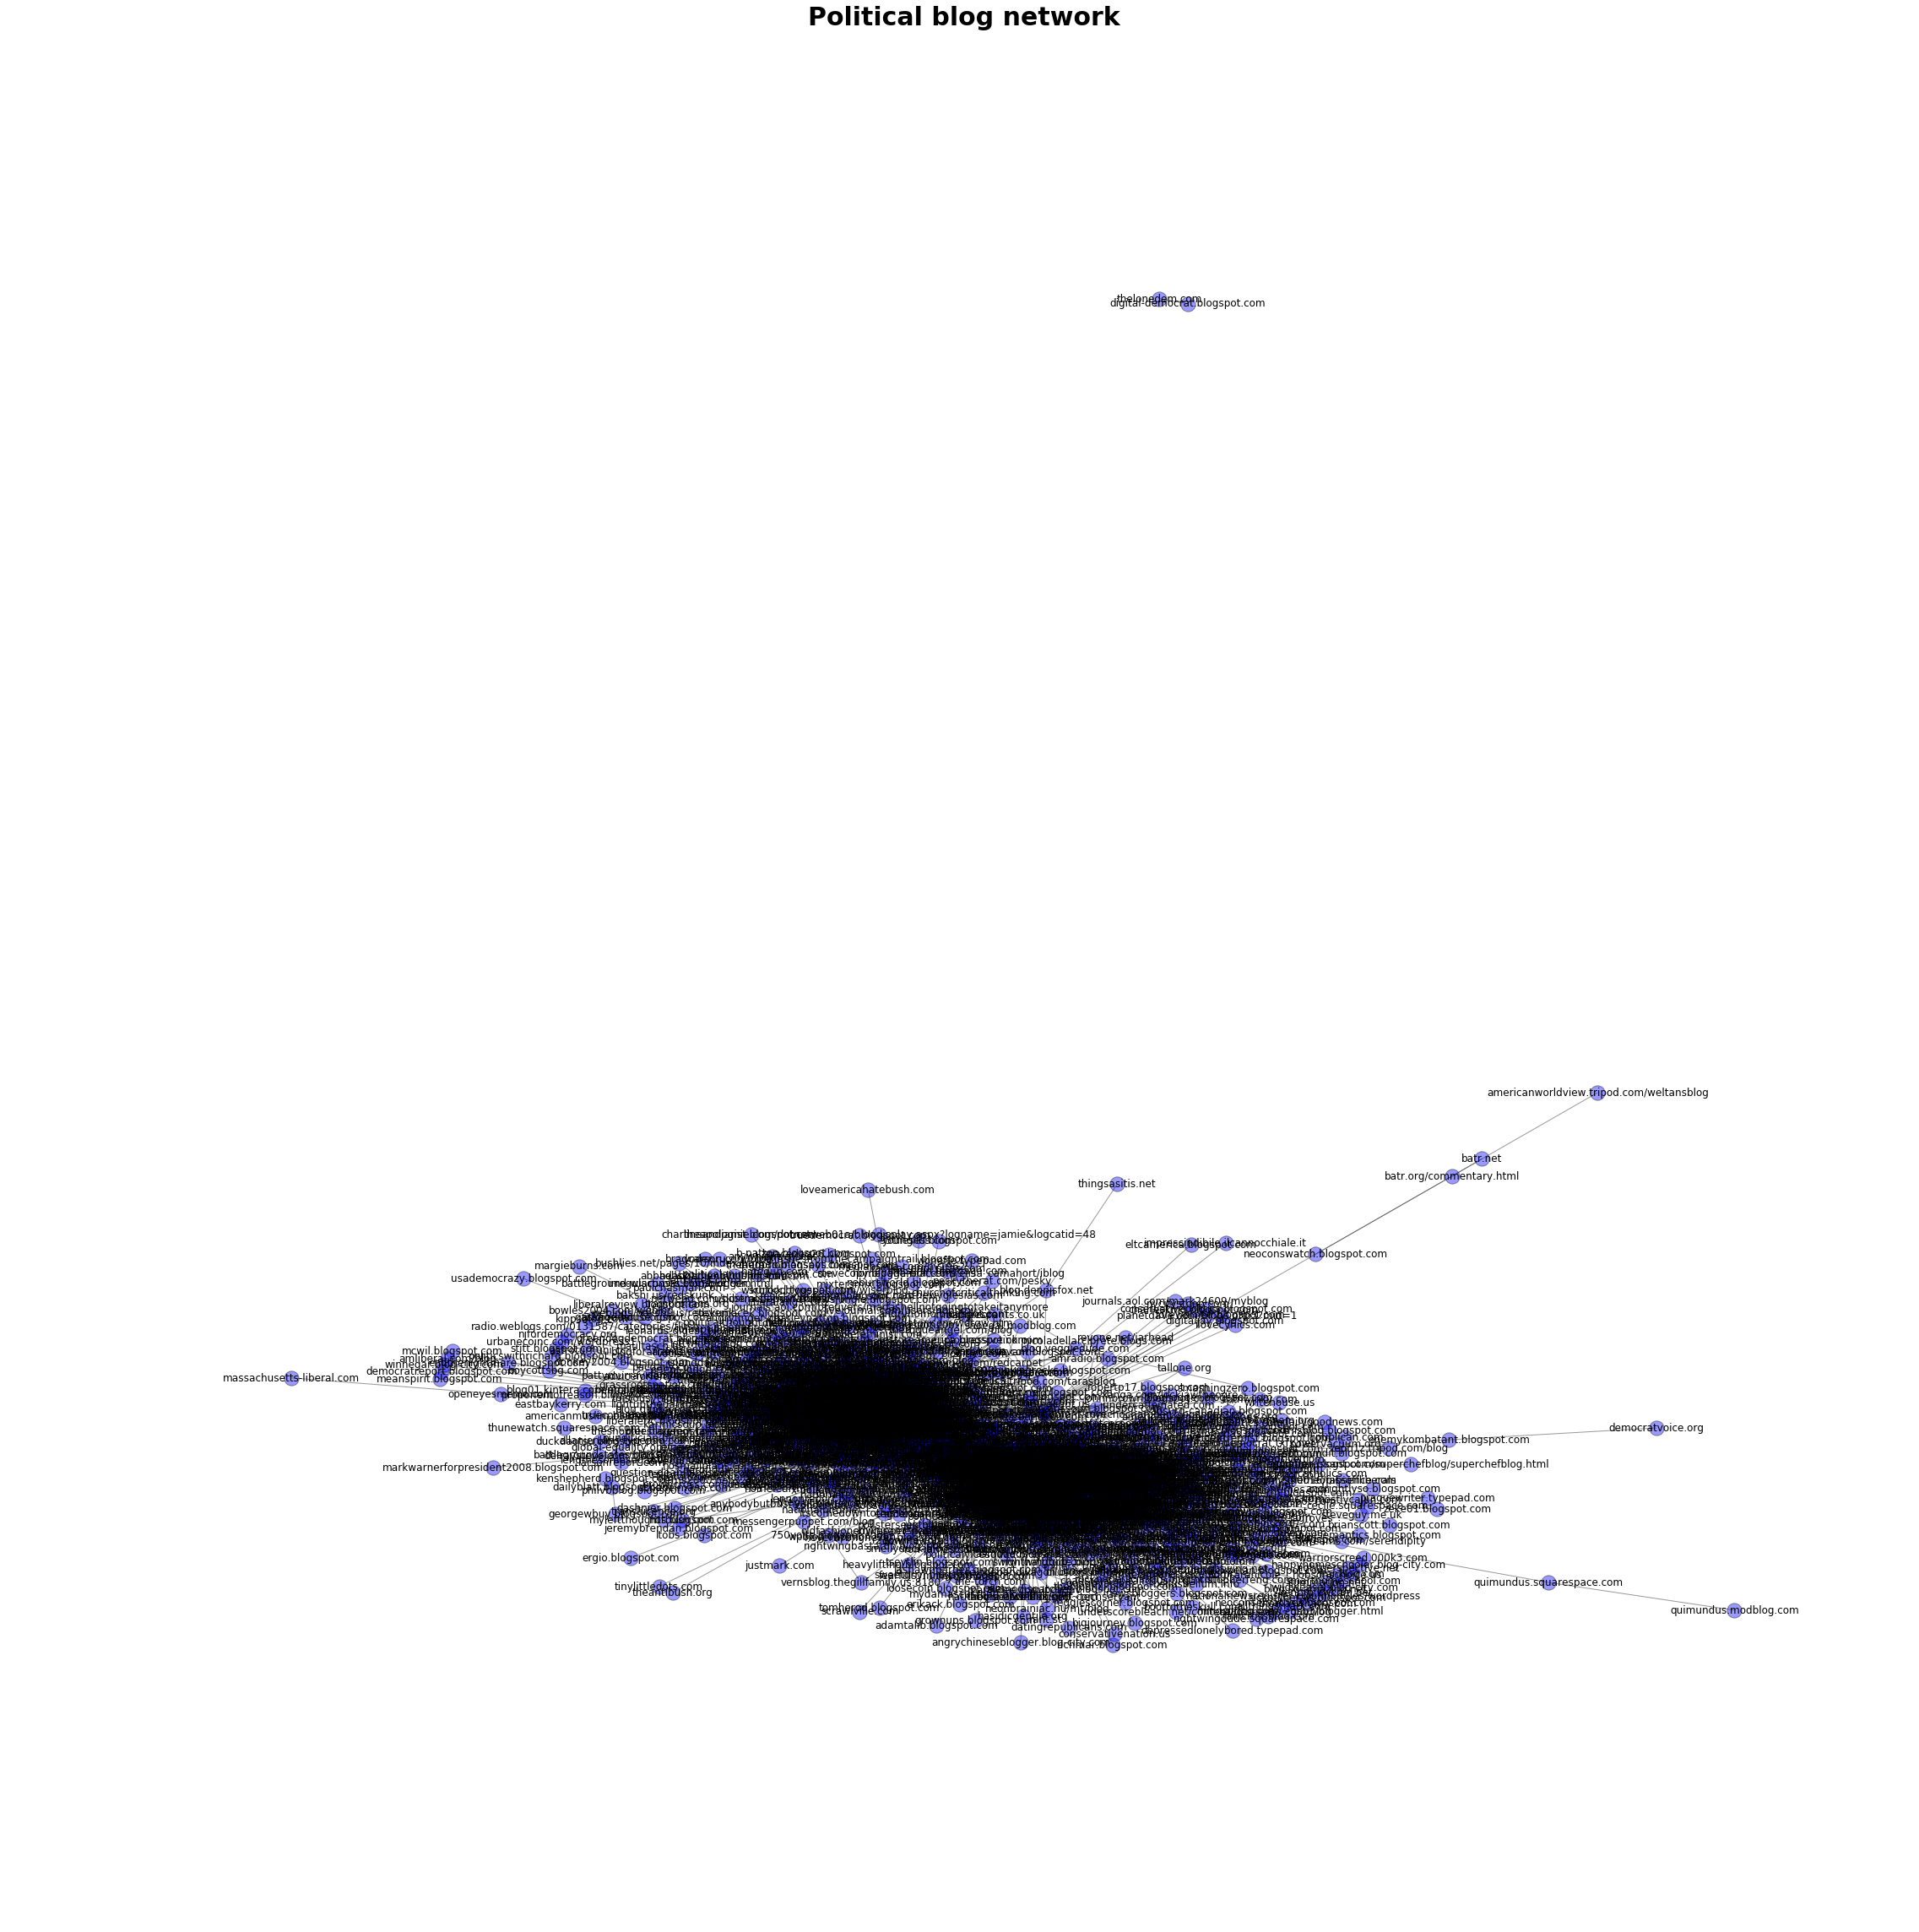

In [72]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [106]:
centrality=nx.eigenvector_centrality_numpy(G)
list_of_blogs = []
for node in centrality:
    list_of_blogs.append((node,centrality[node])) 
list_ = sorted(list_of_blogs, key=lambda x: x[1], reverse = True)

In [107]:
## 10 most influential blogs
list_[:10]

[(u'atrios.blogspot.com', 0.1948229589885675),
 (u'dailykos.com', 0.1609071638581869),
 (u'washingtonmonthly.com', 0.14654050463836454),
 (u'digbysblog.blogspot.com', 0.14265582251978642),
 (u'bodyandsoul.typepad.com', 0.14114853531288882),
 (u'liberaloasis.com', 0.1395378566665858),
 (u'tbogg.blogspot.com', 0.13704857535546833),
 (u'corrente.blogspot.com', 0.12943073134224964),
 (u'talkingpointsmemo.com', 0.1270093107829415),
 (u'dneiwert.blogspot.com', 0.12238703900637996)]

### 3.  What are the 10 least influential blogs?



In [108]:
reverse_list_ = sorted(list_of_blogs, key=lambda x: x[1], reverse = False)
reverse_list_[:10]

[(u'digital-democrat.blogspot.com', 3.4998343773585455e-19),
 (u'thelonedem.com', 6.137830083724385e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.489792408547345e-09),
 (u'quimundus.modblog.com', 6.675725344953934e-08),
 (u'batr.org/commentary.html', 6.794245454826261e-07),
 (u'batr.net', 6.795053204450161e-07),
 (u'democratvoice.org', 1.022160231723017e-06),
 (u'quimundus.squarespace.com', 6.056497487444346e-06),
 (u'massachusetts-liberal.com', 9.4847117466126e-06),
 (u'thingsasitis.net', 1.1737028626600842e-05)]